# Deep Learning (machine perception)

## 1. Introduction

Deep learning is impacting everything from healthcare to transportation to manufacturing, and more. Companies are turning to deep learning to solve hard problems, like speech recognition, object recognition, and machine translation. Apple uses deep learning in Siri, voice assistant application and Memories images organization application. Google uses extensively deep learning and changing the world of AI in Google Brain team. Facebook’s Face Detection and Car Collision detection from Mobileye; some of projects ranging from images classification to image captioning.

## 2. What is deep learning:

sub-domain of AI, Broadly speaking, deep learning is a more approachable name for an artificial neural network. The “deep” in deep learning refers to the depth of the network. An artificial neural network can be very shallow.
Neural networks are inspired by the structure of the cerebral cortex. At the basic level is the perceptron, the mathematical representation of a biological neuron. Like in the cerebral cortex, there can be several layers of interconnected perceptrons. So, an Artifical Neural Network had input layer consisting of multiply nodes(neurons) that connects to outside word(input variables) and hidden layers have multiple nodes connected to each other and finally the output layer to which class label is attached.

Deep learning exploits gigantic datasets to produce powerful models. But what can we do when our datasets are comparatively small? Transfer learning by fine-tuning deep nets offers a way to leverage existing datasets to perform well on new tasks. So, broadly speeking transfer learning is a way to use learned deep neural networks trained on other set of data and use their learning capability to train on other data sets.

## 3. Deep Demo:

Deep learning plays a great role in computer vision, natural language processing and speech recognition. we have used deep learning for image classification using transfer learning. The typical work flow contains image classification; holding an object in front of web-cam using pretrained model. Facial recongnition using transfer learning concepts. In this approach sample dataset from the Facebook is gathered and pre trained model is fine tunned on the new classes i.e. name of persons.

In [1]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

Using TensorFlow backend.


In [7]:
import matplotlib.pyplot as plt

In [2]:
# reterive weights of ResNet, that is trained on imageNet data
model = ResNet50(weights='imagenet')

In [3]:
import cv2

In [50]:
# The block of code below opens up the web-cam and capture the frames that are converted to grayscale
cap = cv2.VideoCapture(0)
i = 0
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    i +=1
    
    if(i>100):
        break

In [51]:
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [54]:
#Resize frame
frame = cv2.resize(frame, (224, 224))

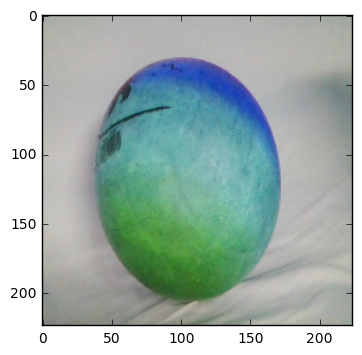

In [55]:
plt.imshow(frame)
plt.show()

In [56]:
frame = frame.astype(float)

In [57]:
# assign frame to x
x=frame

x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [58]:
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n09229709', 'bubble', 0.44652376), ('n02782093', 'balloon', 0.077246182), ('n04562935', 'water_tower', 0.025803359)]


Its really amazing that I have placed a colored ball in front of camera, and model predicted it as bubble & balloon. But if we can observe in the above picture of ball, it looks like bubble because of its round shape and color distribution.

## 4. Fine Tune new set of classes
We used InceptionV3 model and transfered its learning as its top layer is freezed and two new sets of classes are shown to it. The two new classes contains the images of persons that are scrapped through the facebook.

In [59]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K

from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [60]:
# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

In [179]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 2 class
predictions = Dense(2, activation='softmax')(x)

In [180]:
# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

In [181]:
# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

In [182]:
# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

### Prepare data for model input
We just read the images directory that contains two sub directories of images of 2 classes(persons) and applied some transformation on it to map it with InceptionV3 model for onward model training.

In [183]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [184]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [185]:
train_generator = train_datagen.flow_from_directory(
        'F:/abuzar/data/test data',  # this is the target directory
        target_size=(224, 224),  # all images will be resized to 150x150
        batch_size=batch_size)

Found 14 images belonging to 2 classes.


We have not trained model on data very accurately just simply ran only 15 epochs. Although its loss is very high but its prediction is satisfactory

In [186]:
model.fit_generator(train_generator, epochs=15, steps_per_epoch=10)

Epoch 1/15
10/10 [==============================] - 71s - loss: 6.2934    
Epoch 2/15
10/10 [==============================] - 74s - loss: 6.9078    
Epoch 3/15
10/10 [==============================] - 80s - loss: 6.9078    
Epoch 4/15
10/10 [==============================] - 73s - loss: 6.9078    
Epoch 5/15
10/10 [==============================] - 83s - loss: 6.9078    
Epoch 6/15
10/10 [==============================] - 76s - loss: 6.9078    
Epoch 7/15
10/10 [==============================] - 76s - loss: 6.9078    
Epoch 8/15
10/10 [==============================] - 74s - loss: 6.2848    
Epoch 9/15
10/10 [==============================] - 76s - loss: 6.9078    
Epoch 10/15
10/10 [==============================] - 74s - loss: 6.9078    
Epoch 11/15
10/10 [==============================] - 78s - loss: 6.9078    
Epoch 12/15
10/10 [==============================] - 76s - loss: 6.9078    
Epoch 13/15
10/10 [==============================] - 78s - loss: 6.9078    
Epoch 14/15
10/10 [==

## 5. Get prediction with new model

In [197]:
# Read imgaes from local directory
# Image Preprocessing
img_path = 'F:/abuzar/data/test data/Hamza/5.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [198]:
preds = model.predict(x)

In [199]:
print(preds)

[[ 1.  0.]]


In [200]:
train_generator.class_indices

{'Hamza': 0, 'Talha': 1}

As we can see above, the model predicted as [1,0] which indicates that model favors the first class; to verify the class we have shown the classses and it is observed that model favored to Hamza. 


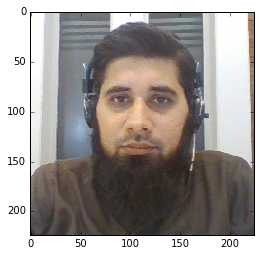

In [201]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.show()

### Webcam face prediction

We have used web cam and captured real time images from the camera and given the same frame to InceptionV3 model. it also predicted 'Hamza' the excat class.

In [204]:
cap = cv2.VideoCapture(0)
i = 0
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    i +=1
    
    if(i>100):
        break

In [205]:
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

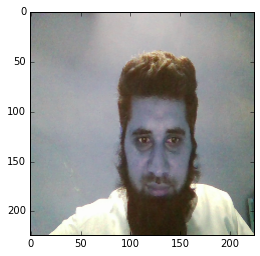

In [206]:
frame = cv2.resize(frame, (224, 224))
plt.imshow(frame)
plt.show()

In [207]:
frame = frame.astype(float)

In [208]:
x = image.img_to_array(frame)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [210]:
preds = model.predict(x)
print(preds)
train_generator.class_indices

[[ 1.  0.]]


{'Hamza': 0, 'Talha': 1}